In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from activephasemap.utils.simulators import UVVisExperiment

## Data from iterations

In [2]:
design_space_bounds = [(0.0, 87.0), (0.0,11.0)]
expt = UVVisExperiment(design_space_bounds, "../data/")
expt.read_iter_data(7)
expt.generate(use_spline=True)

Loading data from iteration 0 with shapes: (24, 2) (24, 101)
Loading data from iteration 1 with shapes: (11, 2) (11, 101)
Loading data from iteration 2 with shapes: (11, 2) (11, 101)
Loading data from iteration 3 with shapes: (11, 2) (11, 101)
Loading data from iteration 4 with shapes: (11, 2) (11, 101)
Loading data from iteration 5 with shapes: (11, 2) (11, 101)
Loading data from iteration 6 with shapes: (11, 2) (11, 101)


## From temperature control experiment 09/26

In [8]:
uvvis_temp_control = pd.read_excel("../uvvis/troubleshoot_all_iters.xlsx", engine='openpyxl')
wavelength = uvvis_temp_control["Wavelength"].to_numpy()
well_names = uvvis_temp_control.columns[1:].to_numpy()

# since we don't have a water sample, take it from the last run
uvvis_data_redisperse = pd.read_excel("../uvvis/redisperse.xlsx", engine='openpyxl')
water = uvvis_data_redisperse.iloc[:,-1].to_numpy()

spectra_temp_control = []
for well_name in well_names:
        y = uvvis_temp_control[well_name].values-water
        spectra_temp_control.append(y)
spectra_temp_control = np.asarray(spectra_temp_control)[:90]
print(spectra_temp_control.shape)

(90, 101)


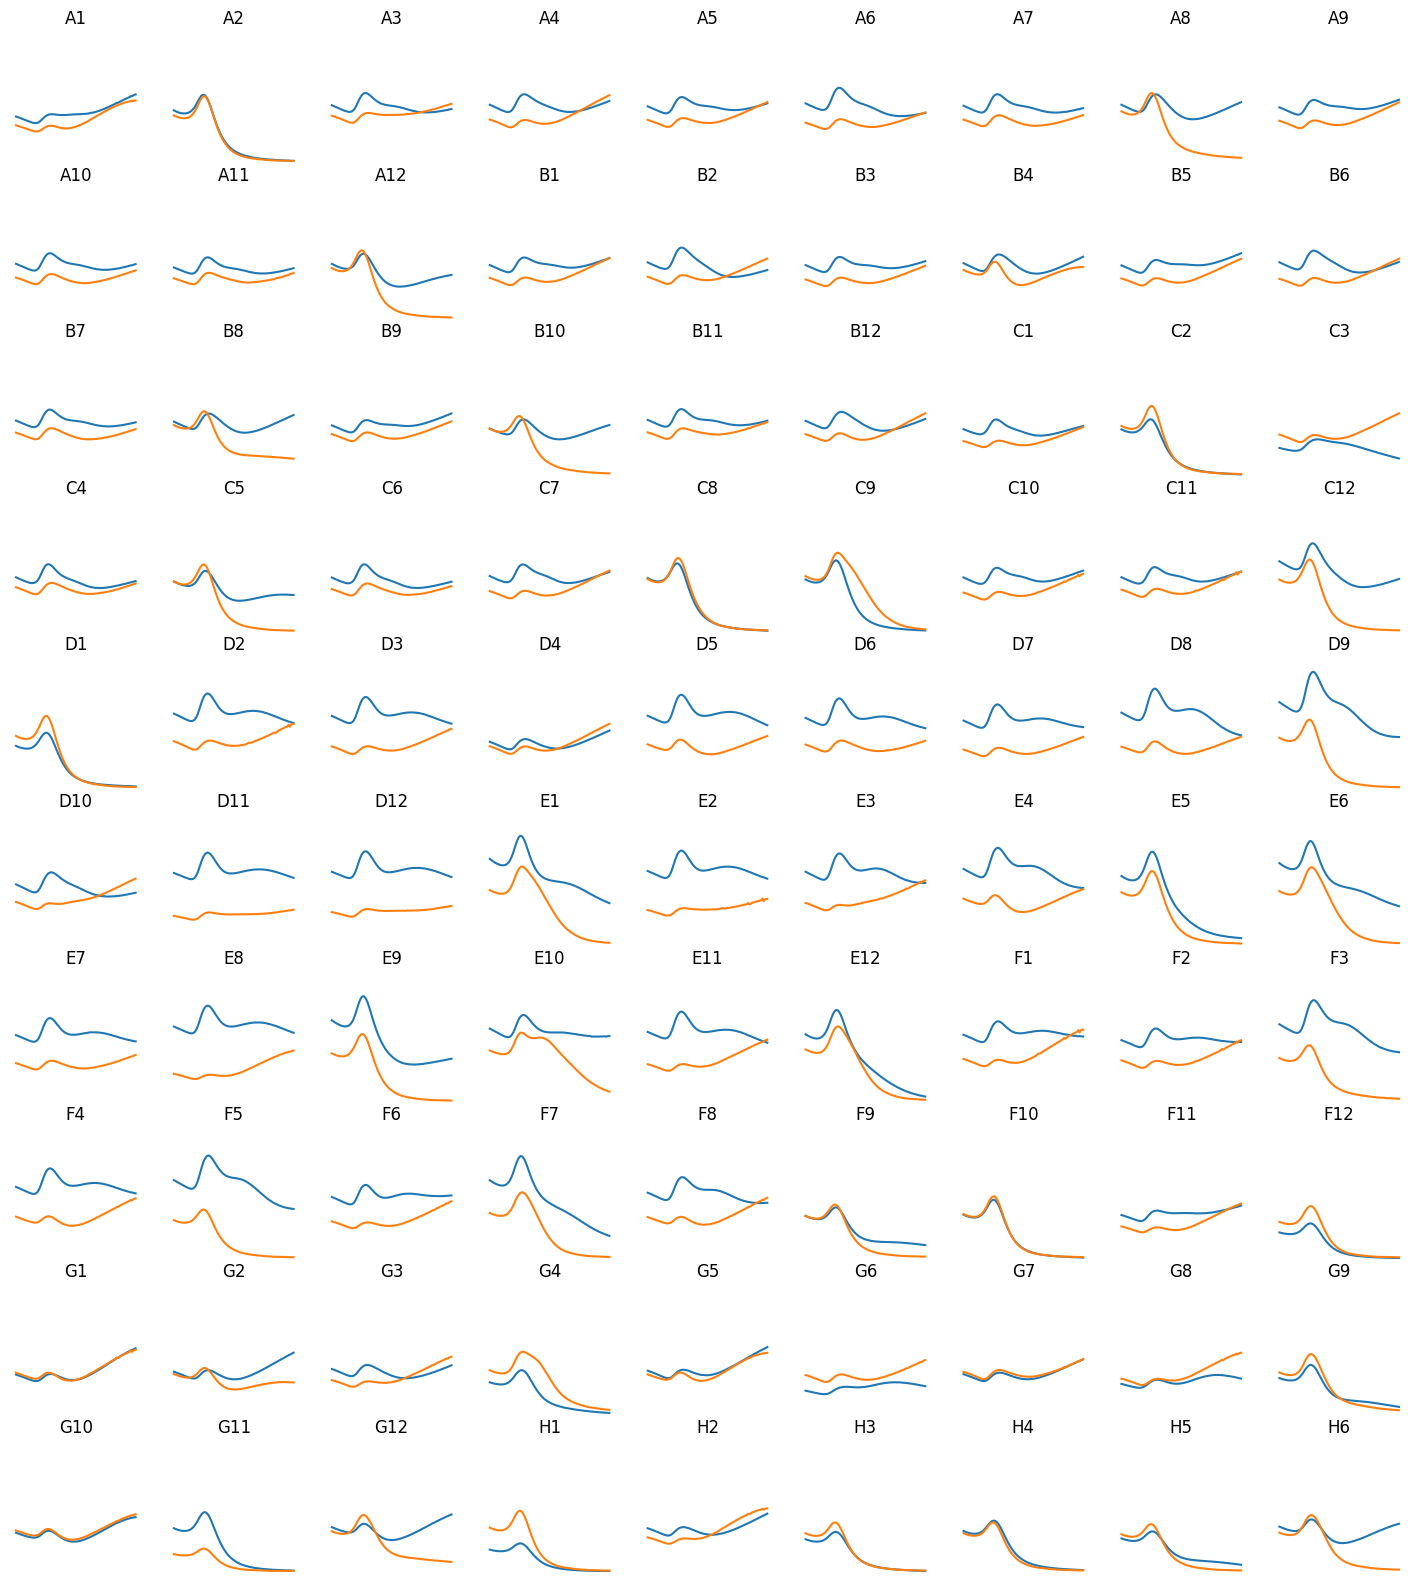

In [13]:
fig, axs = plt.subplots(10,9, figsize=(2*9,2*10))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(wavelength, expt.spectra[i,:])
    ax.plot(wavelength, spectra_temp_control[i,:])
    ax.set_ylim([0.0, 2.2])
    ax.set_title(well_names[i])
    ax.axis("off")
plt.show()

Text(0, 0.5, 'Time delay (min)')

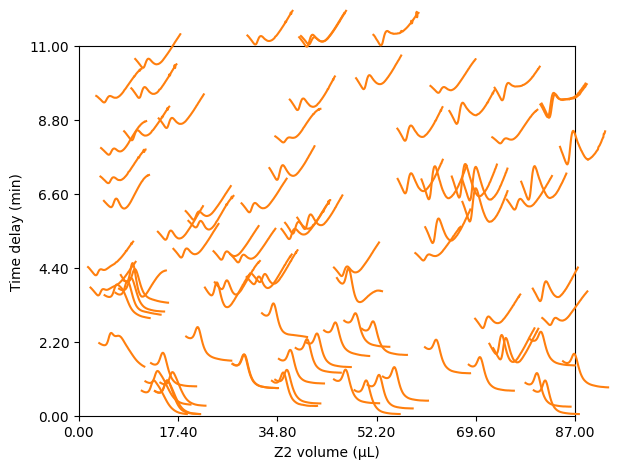

In [14]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

spectra_iters = expt.spectra
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, ax = plt.subplots()
# plot_phasemap(bounds, ax, expt.comps, spectra_iters, limits=[0,1.9])
# plot_phasemap(bounds, ax, expt.comps, spectra_temp_control, limits=[0,1.9], color="tab:orange")
plot_phasemap(bounds, ax, expt.comps, spectra_temp_control, color="tab:orange")
ax.set_xlabel('Z2 volume (µL)')
ax.set_ylabel('Time delay (min)') 

In [28]:
# from scipy.spatial.distance import cdist 
volumes = pd.read_csv('./volumes_all_iters.csv')
times = pd.read_csv('./times_all_iters.csv')
comps = np.vstack((volumes.to_numpy()[:,-1], times.to_numpy()[:,-1])).T
# lookup_id = cdist(np.array([2.20, 8.7]).reshape(1,-1), comps).argmin()
# print(well_names[lookup_id], comps[lookup_id,:])

G8 [3 9]


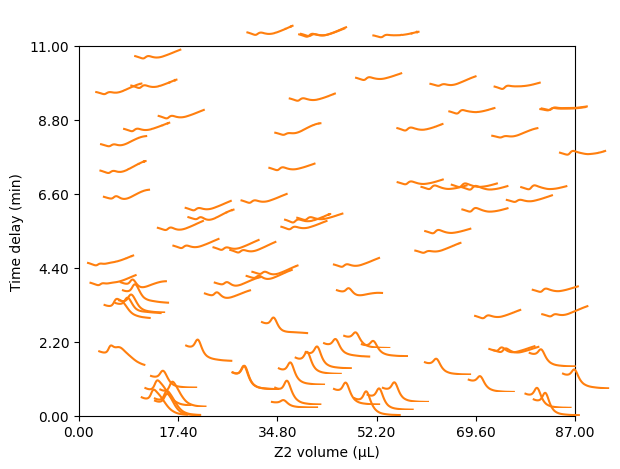

In [15]:
fig, ax = plt.subplots()
plot_phasemap(bounds, ax, expt.comps, spectra_temp_control, limits=[0,1.9], color="tab:orange")
ax.set_xlabel('Z2 volume (µL)')
ax.set_ylabel('Time delay (min)') 
plt.show()

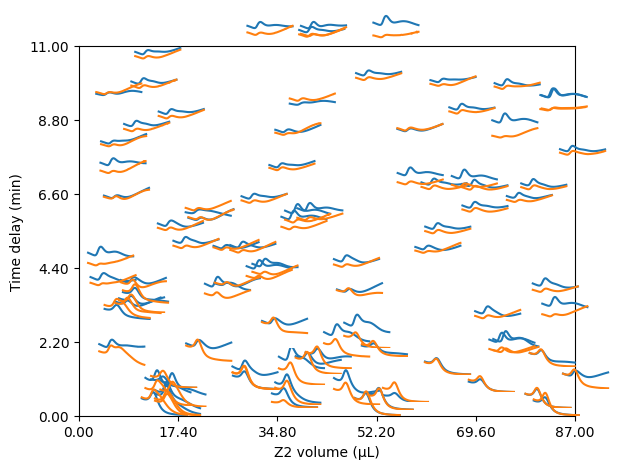

In [17]:
fig, ax = plt.subplots()
plot_phasemap(bounds, ax, expt.comps, spectra_iters, limits=[0,1.9])
plot_phasemap(bounds, ax, expt.comps, spectra_temp_control, limits=[0,1.9], color="tab:orange")
ax.set_xlabel('Z2 volume (µL)')
ax.set_ylabel('Time delay (min)') 
plt.show()